In [26]:
import numpy as np
import pandas as pd

In [27]:
# Load the dataset from 'final.csv' file with UTF-8 encoding
data = pd.read_csv('final.csv', encoding='cp949')
df = pd.DataFrame(data)  # Create a DataFrame from the loaded data
print(df)  # Print the DataFrame to check its contents

          시점  자치구역번호   조출생률  고령인구비율  청년 순이동수      사업체수  문화시설 개수  학원수 (개)  \
0     200802       1  10.01     8.4     2244  358446.0     22.0  11261.0   
1     200803       1   9.73     8.4    -5057  358339.0     22.0  11261.0   
2     200804       1   9.40     8.5    -6978  358233.0     22.0  11261.0   
3     200805       1   8.82     8.5    -8537  358126.0     22.0  11261.0   
4     200806       1   8.60     8.5    -9643  358020.0     22.0  11261.0   
...      ...     ...    ...     ...      ...       ...      ...      ...   
3222  202310      17   4.90    17.8      -26   30464.0      NaN   1212.0   
3223  202311      17   4.30    17.9     -135   30464.0      NaN   1212.0   
3224  202312      17   3.90    17.9     -438   30464.0      NaN   1212.0   
3225  202401      17   5.20    18.0     -761   30464.0      NaN      NaN   
3226  202402      17   5.20    18.1     -546   30464.0      NaN      NaN   

      수강인원 (명)  소멸위험지수   단계  
0     986758.0  2.0452   안정  
1     986758.0  2.0452   안정

In [28]:
# Fill missing values using forward fill method
df.fillna(method='ffill', inplace=True)
# Check for any remaining missing values
df.isna().sum()
# Display the first few rows of the DataFrame
df.head()

,시점,자치구역번호,조출생률,고령인구비율,청년 순이동수,사업체수,문화시설 개수,학원수 (개),수강인원 (명),소멸위험지수,단계
0,200802,1,10.01,8.4,2244,358446.0,22.0,11261.0,986758.0,2.0452,안정
1,200803,1,9.73,8.4,-5057,358339.0,22.0,11261.0,986758.0,2.0452,안정
2,200804,1,9.40,8.5,-6978,358233.0,22.0,11261.0,986758.0,2.0452,안정
3,200805,1,8.82,8.5,-8537,358126.0,22.0,11261.0,986758.0,2.0452,안정
4,200806,1,8.60,8.5,-9643,358020.0,22.0,11261.0,986758.0,2.0452,안정


In [29]:
# Apply StandardScaler for KMeans algorithm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(df.drop(columns=['시점', '자치구역번호','단계','소멸위험지수']))
std_df = pd.DataFrame(std_data, columns=['조출생률','고령인구비율','청년 순이동수','사업체수','문화시설 개수','학원수','수강인원'])
std_df['소멸위험지수'] = df['소멸위험지수']

std_df.head()

,조출생률,고령인구비율,청년 순이동수,사업체수,문화시설 개수,학원수,수강인원,소멸위험지수
0,1.148233,-1.451919,0.668149,1.976151,-0.548177,1.469289,0.885573,2.0452
1,1.020253,-1.451919,-1.503424,1.975295,-0.548177,1.469289,0.885573,2.0452
2,0.869419,-1.427866,-2.074796,1.974446,-0.548177,1.469289,0.885573,2.0452
3,0.604318,-1.427866,-2.538497,1.973589,-0.548177,1.469289,0.885573,2.0452
4,0.503763,-1.427866,-2.867460,1.972741,-0.548177,1.469289,0.885573,2.0452


In [30]:
# Use PCA for visualization of KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(std_data)
pca_data

array([[ 1.88808012,  2.31364472],
       [ 1.50705944,  1.77480023],
       [ 1.41830102,  1.53855384],
       ...,
       [-1.15733259, -1.70947381],
       [-1.2343325 , -1.35072291],
       [-1.22270564, -1.35384695]])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


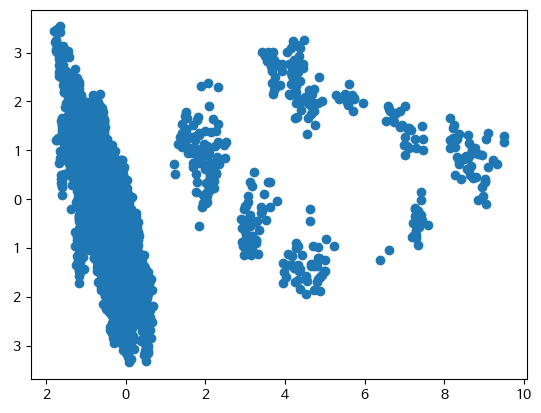

In [31]:
import matplotlib.pyplot as plt

# Plot PCA results
df_pca = pd.DataFrame(data = pca_data, columns=['PC1', 'PC2'])
plt.scatter(df_pca['PC1'], df_pca['PC2'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

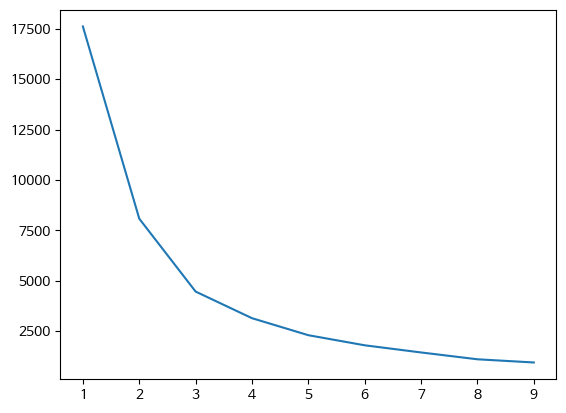

In [32]:
# Use Elbow Method to find the optimal number of clusters
from sklearn.cluster import KMeans

KS = range(1,10)
distortions = []

for k in KS:
    kmeanmodel = KMeans(n_clusters=k)
    kmeanmodel.fit(df_pca)
    distortions.append(kmeanmodel.inertia_)

plt.plot(KS, distortions)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


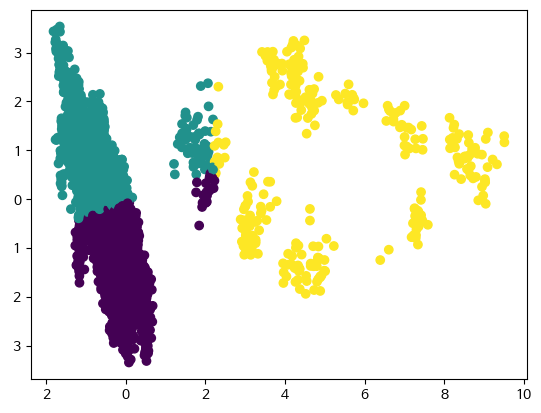

In [33]:
# Perform KMeans clustering with k=3
kmeanmodel = KMeans(n_clusters=3)
kmeanmodel.fit(df_pca)
df_pca['Cluster'] = kmeanmodel.labels_
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmeanmodel.labels_)

#각 Cluster별로 가장 많이 들어있는 지역이 그 Cluster에 속해있는 것으로 간주.

In [34]:
# Assign clusters back to the original DataFrame

# Display the most common region number in each cluster

# Cluster 0
df['Cluster'] = df_pca['Cluster']
df_cluster1 = df.loc[df['Cluster'] == 0, '자치구역번호']
print(df_cluster1.value_counts())

자치구역번호
14    172
10    133
13    129
15    128
2      98
12     89
16     87
3      79
11     79
5      61
4      60
6      59
17     53
7      43
1      21
Name: count, dtype: int64


In [35]:
# Cluster 1
df_cluster1 = df.loc[df['Cluster'] == 1, '자치구역번호']
print(df_cluster1.value_counts())

자치구역번호
7     150
17    140
8     139
6     134
4     133
5     132
3     114
11    114
16    106
12    104
2      95
15     65
13     64
10     60
1      59
14     21
Name: count, dtype: int64


In [36]:
#Cluster 2
df_cluster1 = df.loc[df['Cluster'] == 2, '자치구역번호']
print(df_cluster1.value_counts())

자치구역번호
9    193
1    113
Name: count, dtype: int64


In [37]:
#KMeans Clusturing result with 3 Clusters :

#Cluster 1
#서울특별시, 경기도

#Cluster 2
#울산광역시, 제주특별자치도, 세종특별자치시, 대전광역시, 인천광역시, 광주광역시, 대구광역시,충청북도, 경상남도, 충청남도, 부산광역시

#Cluster 3
#전라남도, 강원특별자치도, 전라북도, 경상북도

In [38]:
# prevent for error about Korean fonts
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

Confusion Matrix for XGBoost:
[[419   0   0]
 [  1 200   0]
 [  0   3  23]]
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       419
           1       0.99      1.00      0.99       201
           2       1.00      0.88      0.94        26

    accuracy                           0.99       646
   macro avg       0.99      0.96      0.98       646
weighted avg       0.99      0.99      0.99       646

Training Accuracy: 1.0
Test Accuracy: 0.9938080495356038
Feature 1: 조출생률, Importance: 0.03282259404659271
Feature 2: 고령인구비율, Importance: 0.5972126126289368
Feature 3: 청년 순이동수, Importance: 0.10202176868915558
Feature 4: 사업체수, Importance: 0.046394992619752884
Feature 5: 문화시설 개수, Importance: 0.04769957438111305
Feature 6: 학원수 (개), Importance: 0.13151225447654724
Feature 7: 수강인원 (명), Importance: 0.042336124926805496
Feature 8: Cluster, Importance: 0.0


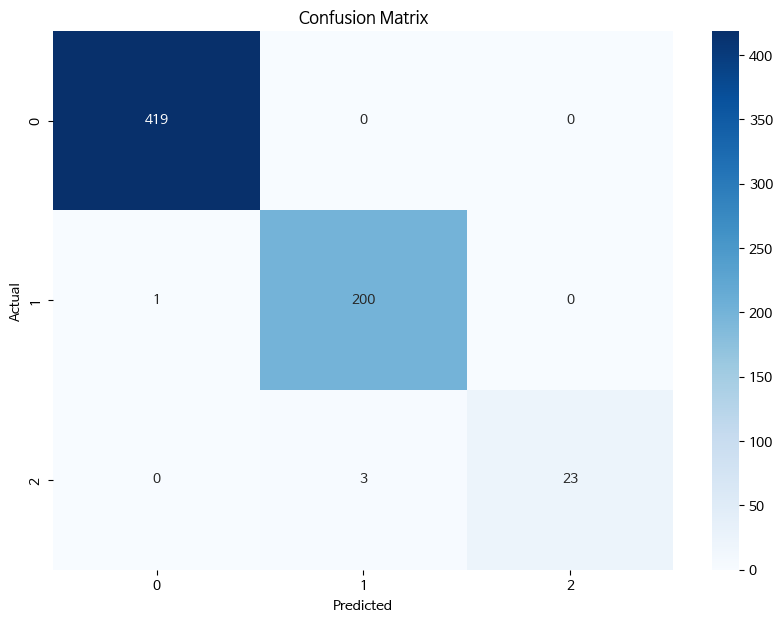

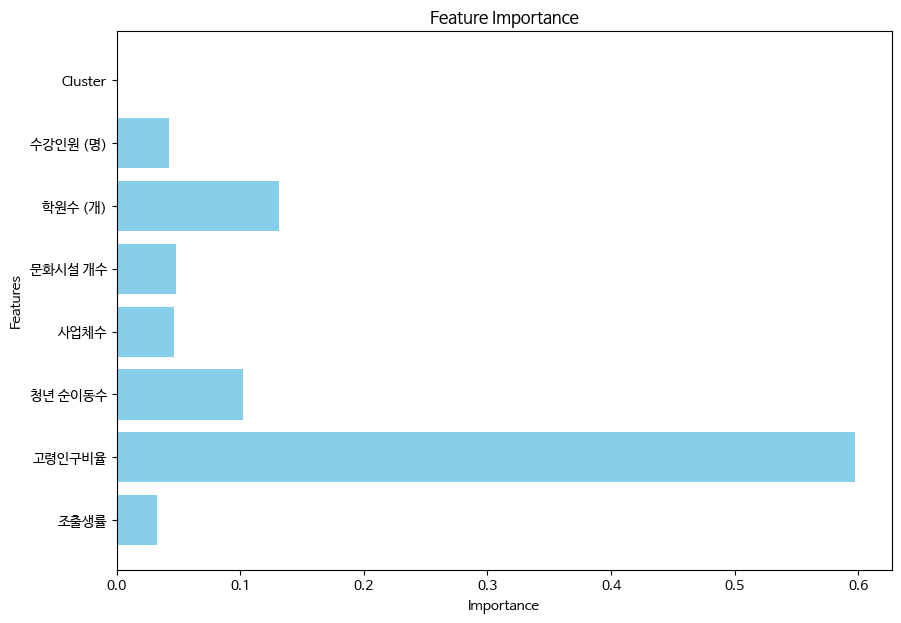

In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Convert the '소멸위험지수' column to a categorical variable (e.g., into 3 bins)
df['소멸위험지수_범주'] = pd.cut(df['소멸위험지수'], bins=3, labels=[0, 1, 2])

# Prepare data for XGBoost model, excluding non-feature columns
X = df.drop(columns=['시점', '자치구역번호', '단계', '소멸위험지수', '소멸위험지수_범주'])
y = df['소멸위험지수_범주']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for XGBoost:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report for XGBoost:")
print(class_report)

# Evaluate and print accuracy scores for training and testing sets
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {accuracy_train}')
print(f'Test Accuracy: {accuracy_test}')

# Get and print feature importance scores from the model
feature_importance = xgb_model.feature_importances_
features = X.columns

# Print feature importance for each feature
for i, (feature, importance) in enumerate(zip(features, feature_importance), 1):
    print(f"Feature {i}: {feature}, Importance: {importance}")

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize feature importance using a bar chart
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10, 7))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()